In [ ]:
# !python -m pip install paddlepaddle-gpu -i https://mirror.baidu.com/pypi/simple
# !git clone https://github.com/PaddlePaddle/PaddleOCR
# !pip install paddleocr

In [ ]:
from paddleocr import PaddleOCR, draw_ocr # main OCR dependencies
from matplotlib import pyplot as plt # plot images
import cv2
import numpy as np
from PIL import Image, ImageDraw
import os
from tqdm.notebook import tqdm

In [ ]:
ocr_model = PaddleOCR(lang='en')

In [23]:
def getMask(inputP):
    result = ocr_model.ocr(inputP)
    img = Image.open(inputP)
    shape = img.size
    array_created = Image.new("RGB", shape, (0,0,0)) 
    for res in result:
        img1 = ImageDraw.Draw(array_created) 
        img1.polygon((res[0][0][0],res[0][0][1],res[0][1][0],res[0][1][1],res[0][2][0],res[0][2][1],res[0][3][0],res[0][3][1]), fill =(255,255,255))

    return array_created

## Single Inference

In [24]:
filename = "./data/input/1639465458479.png"

[2022/05/20 17:31:23] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/05/20 17:31:23] ppocr DEBUG: dt_boxes num : 1, elapse : 0.18680882453918457
[2022/05/20 17:31:23] ppocr DEBUG: rec_res num  : 1, elapse : 0.05728292465209961


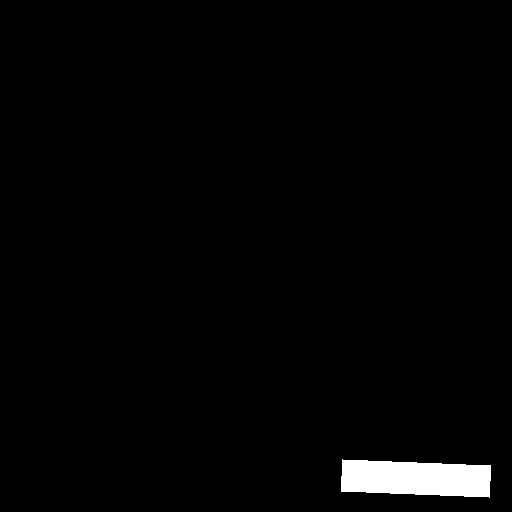

In [25]:
getMask(filename)

## Multiple Inference

In [12]:
inputP = "./data/input/"
outputP = "./data/output"
if not os.path.isdir(outputP):
    os.makedirs(outputP)

In [26]:
for imgN in tqdm(os.listdir(inputP)):
    imgP = os.path.join(inputP,imgN)
    saveP = os.path.join(outputP,imgN)
    mask = getMask(imgP)
    mask.save(saveP)



  0%|          | 0/100 [00:00<?, ?it/s]

[2022/05/20 17:31:31] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/05/20 17:31:31] ppocr DEBUG: dt_boxes num : 0, elapse : 0.06164121627807617
[2022/05/20 17:31:31] ppocr DEBUG: rec_res num  : 0, elapse : 1.430511474609375e-06
[2022/05/20 17:31:32] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/05/20 17:31:32] ppocr DEBUG: dt_boxes num : 0, elapse : 0.12626290321350098
[2022/05/20 17:31:32] ppocr DEBUG: rec_res num  : 0, elapse : 1.430511474609375e-06
[2022/05/20 17:31:32] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/05/20 17:31:32] ppocr DEBUG: dt_boxes num : 2, elapse : 0.23659515380859375
[2022/05/20 17:31:33] ppocr DEBUG: rec_res num  : 2, elapse : 0.13126182556152344
[2022/05/20 17:31:33] ppocr WARNING: Since the angle clas